In [1]:
import pyaerocom as pya
import os
pya.change_verbosity('critical')

/home/jonasg/anaconda3/lib/python3.6/site-packages/geonum/__init__.py:32: UserWarning: Neither LatLon23 nor LatLon are available. Many basic features will not be available (e.g. objects GeoPoint or GeoVector 
  warn('Neither LatLon23 nor LatLon are available. Many basic features '
/home/jonasg/anaconda3/lib/python3.6/site-packages/geonum/__init__.py:42: UserWarning: Plotting of maps etc. is deactivated, please install Basemap
  warn('Plotting of maps etc. is deactivated, please install Basemap')
/home/jonasg/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## Comparison of multiple variables based on model suite and observations

This notebook is based on netCDF files that contain data that has been colocated. The colocated data files can be created using the [ANALYSIS_SCRIPT.py](https://github.com/metno/pyaerocom-synthesis/blob/master/ANALYSIS_SCRIPT.py) file which is part of this repository. 

An overview of the available parameters, models and the corresponding obsnetworks used for the intercomparison study is provided below. 

### Setup paths and notebook options

#### Directory for colocated data files

In [2]:
DATA_DIR = pya.const.OUTPUTDIR + '/colocated_data'
# check if read is ok
if not os.access(DATA_DIR, os.R_OK):
    raise IOError('Cannot access data')

#### Comment on colocated data files

The directory containing colocated data files (*DATA_DIR*) contains sub-directories for each model available. The colocated data files are named using the following convention:

*<var_name>_REF-<obsnetwork_id>_MOD-<model_id>_<ts_type_source>_<start_date>_<stop_date>_<ts_type>_<filter_name>_COLL.nc*

For instance:

*abs550aer_REF-AeronetInvV3Lev2.daily_MOD-INCA-BCext_CTRL2016-PD-3hourly_20100101_20101231_monthly_WORLD-noMOUNTAINS_COLL.nc*

#### Output directory

In [3]:
OUTPUT_DIR = 'output_notebooks/'

WRITE_OK = True
if not os.access(OUTPUT_DIR, os.W_OK):
    print('No write access to output directory, no files will be saved')
    WRITE_OK = False

#### Output files

In [4]:
RESULT_TABLE = OUTPUT_DIR + 'multi_comp_table.csv'
RESULT_TABLE_ALL = OUTPUT_DIR + 'multi_comp_table_ALL.csv'

#### Options

In [5]:
# If False and RESULT_TABLE exists, then the results are simply read from the table CSV file and not reloaded from the
# colocated data .nc files (faster)
RELOAD_RESULTS = False

# It True, all heatmaps created below are saved as png in the above specified output directory
SAVE_HEATMAPS = True

SELECTIVE = False

### Import all NetCDF files containing colocated data

First, check if results table exists and if not make sure results are reloaded. Then read results using reading class *ReadColocatedData*.

In [6]:
from helpers.io import ReadColocatedData
reader = ReadColocatedData(DATA_DIR)

### Analysis of yearly results

The heatmaps displayed below show a set of *N* different models (x-axis) that where analysed within a certain time interval (year, x-axis) against individual variables (y-axis) from individual observation networks. 

The colocated database may contain many more results for a given *obs / var / model (OVM)* combination (e.g. different original time-resolutions, indicated with `ts_type_src` in the `ColocatedData` files, or other time intervals). However, for the heatmaps, we do not want to display all these. We rather wish to focus on *a single* time interval (e.g. 2010) and *a single* original time resolution (e.g. `ts_type_src="monthly"`). However, as these strict specifications are rather restrictive for a give *OVM*, and since we want to include as many *OVM* as possible in the heatmaps, a routine was developed, that iterates over all *OVM* combinations available and for each one, first searches, if a match with the specified `year` (2010) and `ts_type_src` (monthly) can be found, and if not, searches for other availble options.

In [7]:
if SELECTIVE:
    if RELOAD_RESULTS or not os.path.exists(RESULT_TABLE):
        # searches for obs_id, var_name, model_id (OVM) combinations so that for each of these, exatly one row exist. 
        table = reader.compute_statistics_table_unique(ts_type_src='daily', # preferred ts_type of original model-data 
                                                       flex_search=True) # if OVM combination does not exist, use other
                                                   
    else:
        table = reader.read_statistics_table_csv(RESULT_TABLE)    
else:
    if RELOAD_RESULTS or not os.path.exists(RESULT_TABLE_ALL):
        table = reader.compute_statistics_table() 
        table.to_csv(RESULT_TABLE_ALL)
    else:
        table = reader.read_statistics_table_csv(RESULT_TABLE_ALL)  

/home/jonasg/github/pyaerocom-synthesis/helpers/io.py:188: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  parse_dates=False)


#### Display the table with the statistics results

In [8]:
table

ts_type  \
model_id                       year var_name    obs_id                            
CAM5.3-Oslo_AP3-CTRL2016-PD    2010 abs550aer   AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                                AeronetInvV3Lev2.daily  monthly   
                                                AeronetInvV3Lev2.daily   yearly   
                                    ang4487aer  AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                                AeronetSunV3Lev2.daily   yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                    ec550aer    EBASMC                   yearly   
                                                EBASMC                  monthly   
                                    od550aer    AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily   yearly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.aqua              yearly   
                                                MODIS6.terra            monthly   
                                                MODIS6.terra             yearly   
                                    od550dust   AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                    od550gt1aer AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                                AeronetSDAV3Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily   yearly   
                                    od550lt1aer AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                                AeronetSDAV3Lev2.daily  monthly   
                                                AeronetSDAV3Lev2.daily   yearly   
CNRM-AESM2Nud_AP3-CTRL2016-PD  2010 od550aer    AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
...                                                                         ...   
SPRINTARS-T213_AP3-CTRL2016-PD 2008 od550aer    MODIS6.aqua             monthly   
                                                MODIS6.aqua              yearly   
                                                MODIS6.terra            monthly   
                                                MODIS6.terra             yearly   
                                    od550dust   AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                    od550lt1aer AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                               2010 abs550aer   AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                    ang4487aer  AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                    od550aer    AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
                                                AATSRSUv4.3              yearly   
                                                AATSRSUv4.3             monthly   
     

#### Heatmaps of normalised mean bias (nmb) and Pearson correlation coefficient (R)

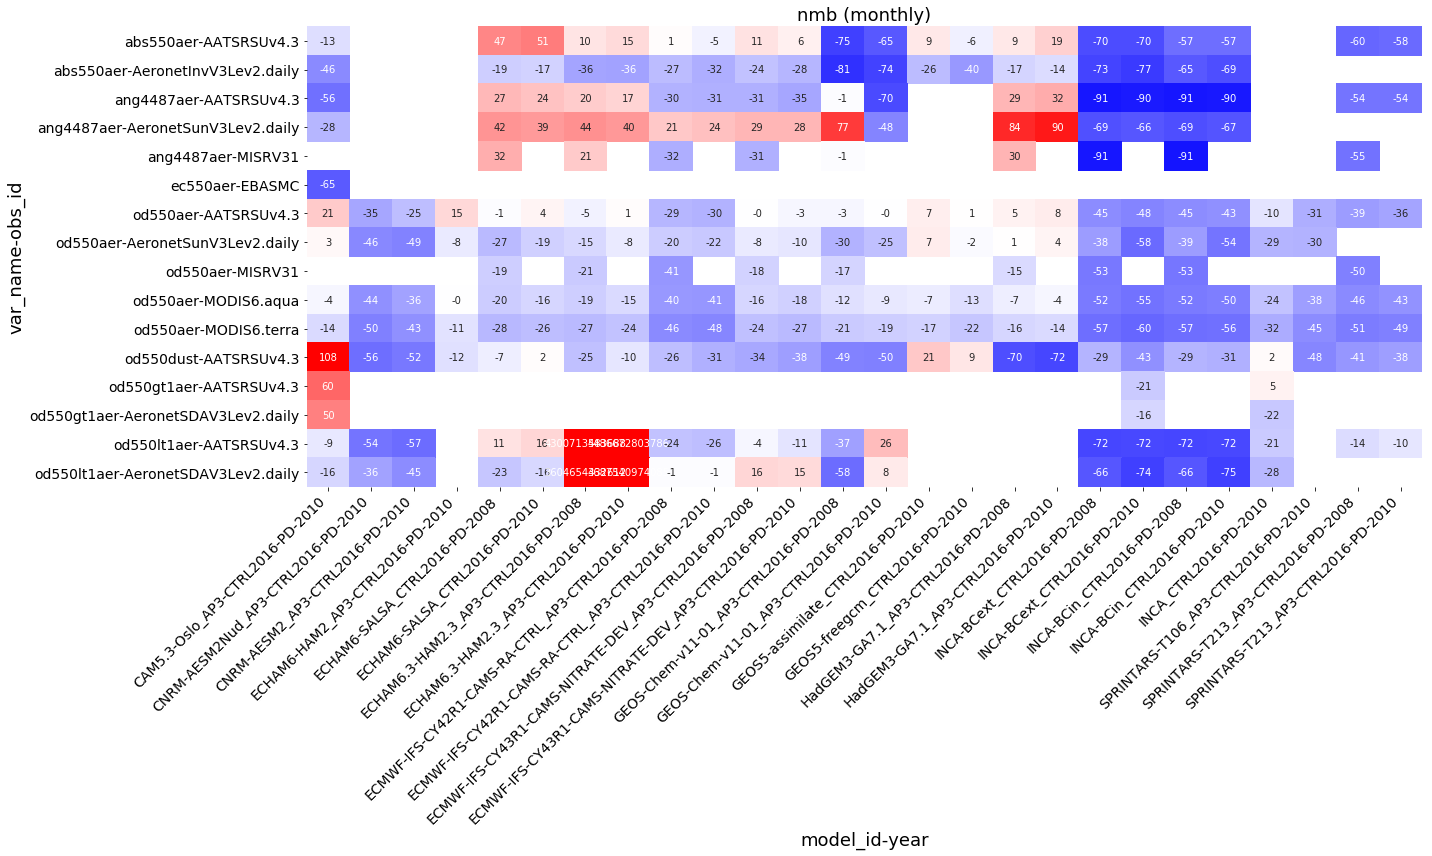

In [9]:
from helpers.io import plot_heatmap
ax = plot_heatmap(table, colname='nmb', ts_type='monthly', color_rowwise=False,
                  figsize=(20, 12), center=0, vmin=-100, vmax=100, output_dir=OUTPUT_DIR, savefig=SAVE_HEATMAPS)

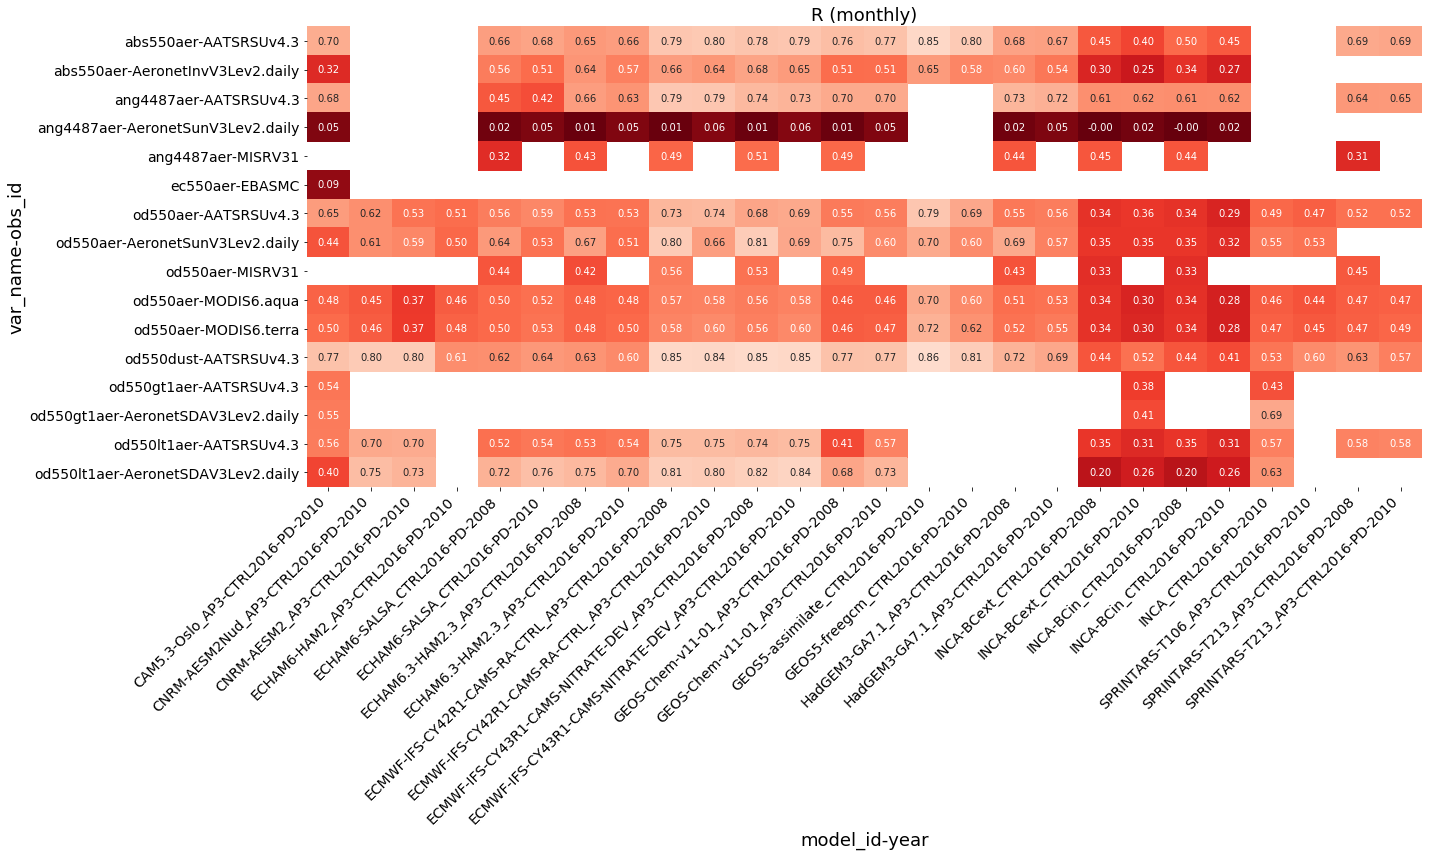

In [10]:
ax= plot_heatmap(table, colname='R', ts_type='monthly', cmap='Reds_r', vmin=0, vmax=1, num_digits=2, color_rowwise=False,
                 figsize=(20, 12), output_dir=OUTPUT_DIR, savefig=SAVE_HEATMAPS)